<a href="https://colab.research.google.com/github/SiluniKeerthiratne/DSGP/blob/siluni/inceptionv3_(_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train #1
*   Trained on 1611 images (2/5 apple,banna)
*   Accuracy 0.98




In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [24]:
train_path = "/content/drive/MyDrive/DSGPDevelopment/dataset copy 4/train"
valid_path = '/content/drive/MyDrive/DSGPDevelopment/dataset copy 4/validation'
test_path = '/content/drive/MyDrive/DSGPDevelopment/dataset copy 4/test'
img_size =  (224,224,3)
IMG_SIZE = (224, 224)
BATCH_SIZE = 8
EPOCHS = 30

In [25]:
datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             channel_shift_range = 10,
                             horizontal_flip = True,
                             fill_mode = 'nearest')

In [26]:
train_dataset = datagen.flow_from_directory(directory = train_path,
                                                  color_mode = "rgb",
                                                  target_size = (224,224),
                                                  interpolation = 'bicubic',
                                                  class_mode = "categorical",
                                                  shuffle = True,
                                                  batch_size = BATCH_SIZE)

validation_dataset  = datagen.flow_from_directory(directory = valid_path,
                                            color_mode = "rgb",
                                            target_size = (224,224),
                                            interpolation = 'bicubic',
                                            class_mode = "categorical",
                                            shuffle = False,
                                            batch_size = BATCH_SIZE)
test_dataset  = datagen.flow_from_directory(directory = test_path,
                                           color_mode = "rgb",
                                           target_size = (224,224),
                                           interpolation = 'bicubic',
                                           class_mode = "categorical",
                                           shuffle = False,
                                           batch_size = BATCH_SIZE)

Found 1611 images belonging to 2 classes.
Found 458 images belonging to 2 classes.
Found 365 images belonging to 2 classes.


In [27]:
import tensorflow as tf
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

In [28]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [29]:
base_model.trainable = False
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(8, 5, 5, 2048)


In [30]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(8, 2048)


In [31]:
prediction_layer = tf.keras.layers.Dense(2, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(8, 2)


In [32]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [33]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                           

In [35]:
history = model.fit(train_dataset,
                    epochs=EPOCHS,
                    validation_data=validation_dataset)

Epoch 1/30
202/202 [==============================] - 421s 2s/step - loss: 0.4079 - accuracy: 0.8125 - val_loss: 0.2524 - val_accuracy: 0.8996
Epoch 2/30
202/202 [==============================] - 170s 843ms/step - loss: 0.2212 - accuracy: 0.9230 - val_loss: 0.1885 - val_accuracy: 0.9301
Epoch 3/30
202/202 [==============================] - 173s 858ms/step - loss: 0.1686 - accuracy: 0.9410 - val_loss: 0.1602 - val_accuracy: 0.9541
Epoch 4/30
202/202 [==============================] - 170s 844ms/step - loss: 0.1452 - accuracy: 0.9522 - val_loss: 0.1455 - val_accuracy: 0.9498
Epoch 5/30
202/202 [==============================] - 173s 859ms/step - loss: 0.1168 - accuracy: 0.9677 - val_loss: 0.1191 - val_accuracy: 0.9672
Epoch 6/30
202/202 [==============================] - 168s 834ms/step - loss: 0.1049 - accuracy: 0.9665 - val_loss: 0.1253 - val_accuracy: 0.9629
Epoch 7/30
202/202 [==============================] - 173s 857ms/step - loss: 0.1080 - accuracy: 0.9652 - val_loss: 0.1007 - va

In [ ]:
# history2=model.fit(train_dataset,
#                   epochs=20,
#                   validation_data=validation_dataset)

In [36]:
score = model.evaluate(test_dataset)
print("Accuracy: ",score[1])

46/46 [==============================] - 100s 2s/step - loss: 0.0496 - accuracy: 0.9781
Accuracy:  0.9780821800231934


In [37]:
from sklearn.metrics import classification_report
test_labels = test_dataset.classes
predictions = model.predict(test_dataset, verbose=1)
y_pred = np.argmax(predictions, axis=-1)
print(classification_report(test_labels, y_pred, target_names = test_dataset.class_indices))

46/46 [==============================] - 37s 741ms/step
              precision    recall  f1-score   support

       fresh       0.98      0.99      0.98       180
      rotten       0.99      0.98      0.98       185

    accuracy                           0.98       365
   macro avg       0.98      0.98      0.98       365
weighted avg       0.98      0.98      0.98       365



In [38]:
score = model.evaluate(test_dataset)
print("Accuracy: ",score[1])

46/46 [==============================] - 30s 649ms/step - loss: 0.0601 - accuracy: 0.9808
Accuracy:  0.9808219075202942


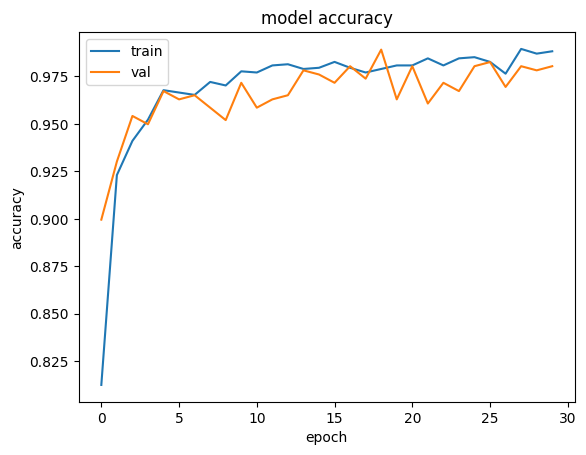

In [39]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

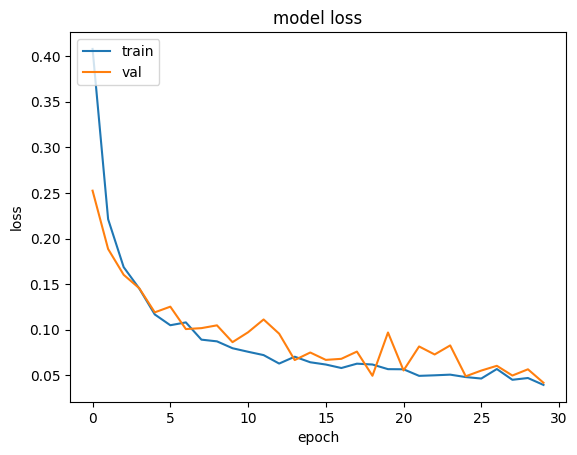

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()